<a href="https://colab.research.google.com/github/Anjum-Ul-Muqset/Malicious-URL-Detection/blob/main/Evaluating_Different_Machine_Learning_Models_for_Malicious_URL_Detection_by_Employing_Natural_Language_Processing_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install -U -q scikit-learn joblib seaborn colorama tld plotly whois wordcloud gensim nltk tldextract hmmlearn xgboost lightgbm catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.8/263.8 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 40.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.7/97.7 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.4/160.4 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 52.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 2.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is no

In [ ]:
!pip install tld

In [ ]:
!pip install --upgrade scikit-learn

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 7.0 MB/s eta 0:00:00


## **Importing Libraries**

In [ ]:
import re
import string
import nltk
import tldextract
import hashlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from colorama import Fore
from urllib.parse import urlparse
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from tld import get_tld, is_tld
from tld.exceptions import TldDomainNotFound, TldBadUrl, TldIOError
import logging
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import whois
from sklearn.pipeline import Pipeline
from datetime import datetime
from plotly.subplots import make_subplots
from wordcloud import WordCloud
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import RidgeClassifier, Perceptron, SGDClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import shap
import time
from sklearn.metrics import f1_score
from sklearn.inspection import permutation_importance


## **Importing Files**

In [ ]:
urls_data = pd.read_csv('malicious_phish.csv')
urls_data.head(10)

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign
8,http://www.pashminaonline.com/pure-pashminas,defacement
9,allmusic.com/album/crazy-from-the-heat-r16990,benign


In [ ]:
urls_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     651191 non-null  object
 1   type    651191 non-null  object
dtypes: object(2)
memory usage: 9.9+ MB


In [ ]:
urls_data.isnull().sum()

url     0
type    0
dtype: int64

In [ ]:
count = urls_data.type.value_counts()
count

benign        428103
defacement     96457
phishing       94111
malware        32520
Name: type, dtype: int64

## **Types of URL**

In [ ]:
count = urls_data['type'].value_counts()
colors = [
    '#FF6633', '#FFB399', '#FF33FF', '#FFFF99', '#00B3E6',
    '#E6B333', '#3366E6', '#999966', '#99FF99', '#B34D4D'
]
fig = go.Figure(data=[go.Bar(x=count.index, y=count, marker=dict(color=colors))])
fig.update_layout(
    xaxis_title='Types',
    yaxis_title='Count',
    title='Count of Different Types of URLs',
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white')
)
fig.update_xaxes(tickfont=dict(color='white'))
fig.update_yaxes(tickfont=dict(color='white'))
fig.show()


In [ ]:
url_type_counts = urls_data['type'].value_counts()
fig = go.Figure(data=[go.Pie(labels=url_type_counts.index, values=url_type_counts.values)])
fig.update_layout(title='Distribution of URL Types',
                  template='plotly_dark',
                  font=dict(color='white'),
                  showlegend=True)
fig.show()

## **omit the (www.) from the URL**

In [ ]:
urls_data['url'] = urls_data['url'].replace('www.', '', regex=True)
urls_data

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://garage-pirenne.be/index.php?option=com_...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement
...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing
651188,gamespot.com/xbox360/action/deadspace/,phishing
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing


In [ ]:
urls_data["type"].value_counts()

benign        428103
defacement     96457
phishing       94111
malware        32520
Name: type, dtype: int64

In [ ]:
rem = {"Category": {"benign": 0, "defacement": 1, "phishing":2, "malware":3}}
urls_data['Category'] = urls_data['type']
urls_data = urls_data.replace(rem)

In [ ]:
urls_data.head()

,url,type,Category
0,br-icloud.com.br,phishing,2
1,mp3raid.com/music/krizz_kaliko.html,benign,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1


## **Feature Extraction**

In [ ]:
urls_data['url_len'] = urls_data['url'].apply(lambda x: len(str(x)))


def process_tld(url):
    try:
        res = get_tld(url, as_object = True, fail_silently=False,fix_protocol=True)
        pri_domain= res.parsed_url.netloc
    except :
        pri_domain= None
    return pri_domain

urls_data['domain'] = urls_data['url'].apply(lambda i: process_tld(i))


In [ ]:
urls_data.head()

,url,type,Category,url_len,domain
0,br-icloud.com.br,phishing,2,16,br-icloud.com.br
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,mp3raid.com
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,bopsecrets.org
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,garage-pirenne.be
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,adventure-nicaragua.net


In [ ]:
def extract_pri_domain(url):
    try:
        res = get_tld(url, as_object = True, fail_silently=False,fix_protocol=True)
        pri_domain= res.parsed_url.netloc
    except :
        pri_domain= None
    return pri_domain

In [ ]:
urls_data['pri_domain'] = urls_data['url'].apply(lambda x: extract_pri_domain(x))

In [ ]:
urls_data.head()

,url,type,Category,url_len,domain,pri_domain
0,br-icloud.com.br,phishing,2,16,br-icloud.com.br,br-icloud.com.br
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,mp3raid.com,mp3raid.com
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,bopsecrets.org,bopsecrets.org
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,garage-pirenne.be,garage-pirenne.be
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,adventure-nicaragua.net,adventure-nicaragua.net


In [ ]:
feature = ['@','?','-','=','.','#','%','+','$','!','*',',','//']
for a in feature:
    urls_data[a] = urls_data['url'].apply(lambda i: i.count(a))

urls_data.head()

,url,type,Category,url_len,domain,pri_domain,@,?,-,=,.,#,%,+,$,!,*,",",//
0,br-icloud.com.br,phishing,2,16,br-icloud.com.br,br-icloud.com.br,0,0,1,0,2,0,0,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,mp3raid.com,mp3raid.com,0,0,0,0,2,0,0,0,0,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,bopsecrets.org,bopsecrets.org,0,0,0,0,2,0,0,0,0,0,0,0,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,garage-pirenne.be,garage-pirenne.be,0,1,1,4,2,0,0,0,0,0,0,0,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,adventure-nicaragua.net,adventure-nicaragua.net,0,1,1,3,2,0,0,0,0,0,0,0,1


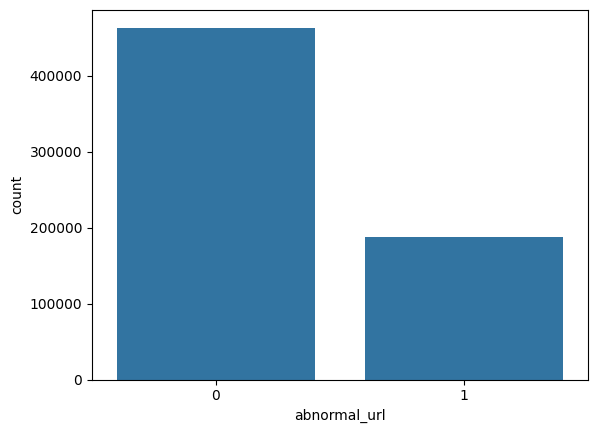

In [ ]:
def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0

urls_data['abnormal_url'] = urls_data['url'].apply(lambda i: abnormal_url(i))

sns.countplot(x='abnormal_url', data=urls_data);

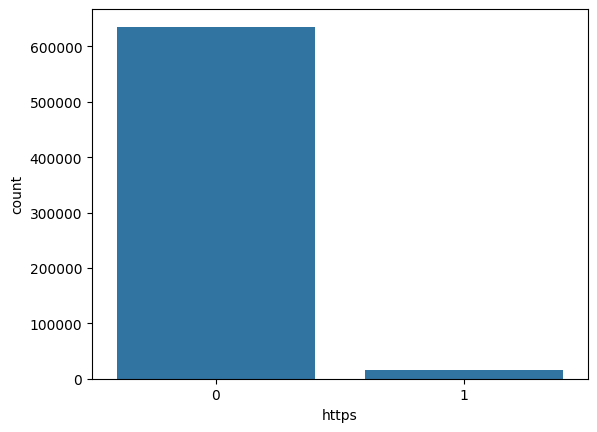

In [ ]:
def httpSecure(url):
    htp = urlparse(url).scheme
    match = str(htp)
    if match=='https':
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0

urls_data['https'] = urls_data['url'].apply(lambda i: httpSecure(i))

sns.countplot(x='https', data=urls_data);

In [ ]:
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits

urls_data['digits']= urls_data['url'].apply(lambda i: digit_count(i))

In [ ]:
def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters

urls_data['letters']= urls_data['url'].apply(lambda i: letter_count(i))

In [ ]:
urls_data.head()

,url,type,Category,url_len,domain,pri_domain,@,?,-,=,...,+,$,!,*,",",//,abnormal_url,https,digits,letters
0,br-icloud.com.br,phishing,2,16,br-icloud.com.br,br-icloud.com.br,0,0,1,0,...,0,0,0,0,0,0,0,0,0,13
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,mp3raid.com,mp3raid.com,0,0,0,0,...,0,0,0,0,0,0,0,0,1,29
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,bopsecrets.org,bopsecrets.org,0,0,0,0,...,0,0,0,0,0,0,0,0,1,25
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,garage-pirenne.be,garage-pirenne.be,0,1,1,4,...,0,0,0,0,0,1,1,0,7,60
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,adventure-nicaragua.net,adventure-nicaragua.net,0,1,1,3,...,0,0,0,0,0,1,1,0,22,199


## **Check shortening service**

In [ ]:
def Shortining_Service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0


urls_data['Shortining_Service'] = urls_data['url'].apply(lambda x: Shortining_Service(x))



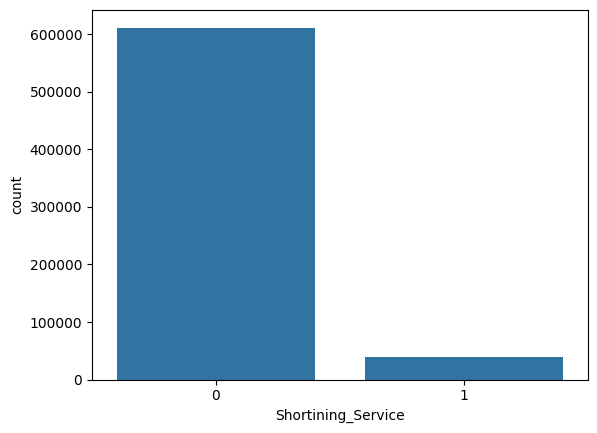

In [ ]:
sns.countplot(x='Shortining_Service', data=urls_data);

## **Check IP**

In [ ]:
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4 with port
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}|'
        '([0-9]+(?:\.[0-9]+){3}:[0-9]+)|'
        '((?:(?:\d|[01]?\d\d|2[0-4]\d|25[0-5])\.){3}(?:25[0-5]|2[0-4]\d|[01]?\d\d|\d)(?:\/\d{1,2})?)', url)  # Ipv6
    if match:
        return 1
    else:
        return 0

urls_data['having_ip_address'] = urls_data['url'].apply(lambda i: having_ip_address(i))
urls_data['having_ip_address'].value_counts()


0    638703
1     12488
Name: having_ip_address, dtype: int64

In [ ]:
urls_data

,url,type,Category,url_len,domain,pri_domain,@,?,-,=,...,!,*,",",//,abnormal_url,https,digits,letters,Shortining_Service,having_ip_address
0,br-icloud.com.br,phishing,2,16,br-icloud.com.br,br-icloud.com.br,0,0,1,0,...,0,0,0,0,0,0,0,13,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,mp3raid.com,mp3raid.com,0,0,0,0,...,0,0,0,0,0,0,1,29,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,bopsecrets.org,bopsecrets.org,0,0,0,0,...,0,0,0,0,0,0,1,25,0,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,garage-pirenne.be,garage-pirenne.be,0,1,1,4,...,0,0,0,1,1,0,7,60,0,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,adventure-nicaragua.net,adventure-nicaragua.net,0,1,1,3,...,0,0,0,1,1,0,22,199,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,2,39,xbox360.ign.com,xbox360.ign.com,0,0,0,0,...,0,0,0,0,0,0,12,21,0,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,2,44,games.teamxbox.com,games.teamxbox.com,0,0,2,0,...,0,0,0,0,0,0,7,29,1,0
651188,gamespot.com/xbox360/action/deadspace/,phishing,2,38,gamespot.com,gamespot.com,0,0,0,0,...,0,0,0,0,0,0,3,30,1,0
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,2,45,en.wikipedia.org,en.wikipedia.org,0,0,0,0,...,0,0,0,0,0,0,0,36,0,0


## **Visualizing DATA**

In [ ]:
urls_data.shape

(651191, 25)

In [ ]:
true_color = 'green'

false_color = 'red'

shortened_counts = urls_data['Shortining_Service'].value_counts()
colors = [true_color if val else false_color for val in shortened_counts.index]
fig_shortened = go.Figure(data=go.Bar(x=shortened_counts.index, y=shortened_counts, marker_color=colors))
fig_shortened.update_layout(title='Counts of shortened',
                            xaxis_title='Value',
                            yaxis_title='Count',
                            template='plotly_dark',
                            font=dict(color='white'))
fig_shortened.show()

abnormal_url_counts = urls_data['abnormal_url'].value_counts()
colors = [true_color if val else false_color for val in abnormal_url_counts.index]
fig_abnormal_url = go.Figure(data=go.Bar(x=abnormal_url_counts.index, y=abnormal_url_counts, marker_color=colors))
fig_abnormal_url.update_layout(title='Counts of abnormal_url',
                               xaxis_title='Value',
                               yaxis_title='Count',
                               template='plotly_dark',
                               font=dict(color='white'))
fig_abnormal_url.show()

secure_http_counts = urls_data['https'].value_counts()
colors = [true_color if val else false_color for val in secure_http_counts.index]
fig_secure_http = go.Figure(data=go.Bar(x=secure_http_counts.index, y=secure_http_counts, marker_color=colors))
fig_secure_http.update_layout(title='Counts of secure_http',
                              xaxis_title='Value',
                              yaxis_title='Count',
                              template='plotly_dark',
                              font=dict(color='white'))
fig_secure_http.show()

have_ip_counts = urls_data['having_ip_address'].value_counts()
colors = [true_color if val else false_color for val in have_ip_counts.index]
fig_have_ip = go.Figure(data=go.Bar(x=have_ip_counts.index, y=have_ip_counts, marker_color=colors))
fig_have_ip.update_layout(title='Counts of have_ip',
                          xaxis_title='Value',
                          yaxis_title='Count',
                          template='plotly_dark',
                          font=dict(color='white'))
fig_have_ip.show()

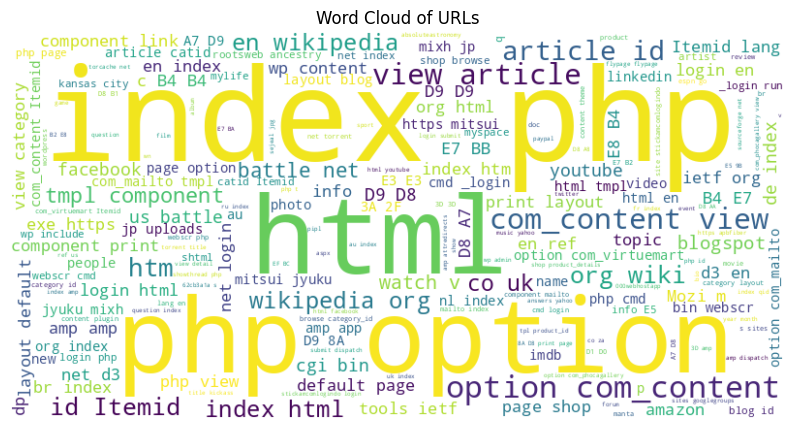

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(urls_data['url']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of URLs')
plt.show()

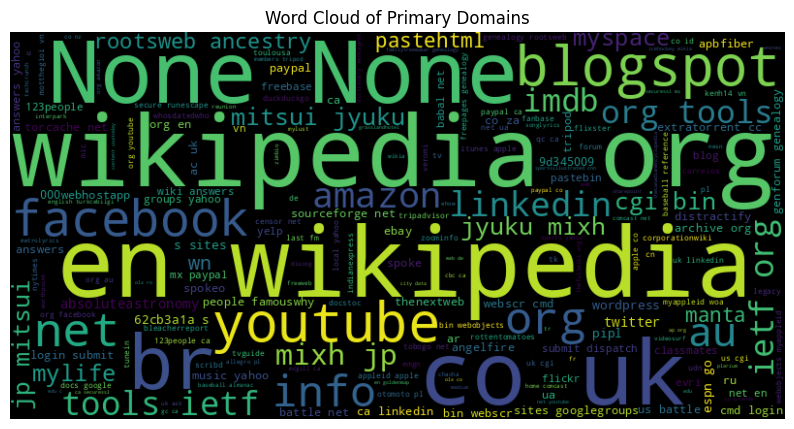

In [ ]:
filtered_domains = urls_data['domain'].map(str).dropna()

# Concatenate all pri_domain values into a single string
text = ' '.join(filtered_domains)

# Generate the WordCloud data
wordcloud = WordCloud(background_color='black', colormap='viridis', width=800, height=400).generate(text)

# Plot the WordCloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Primary Domains', color='black')
plt.show()

<ipython-input-35-89e1b6e985dc>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

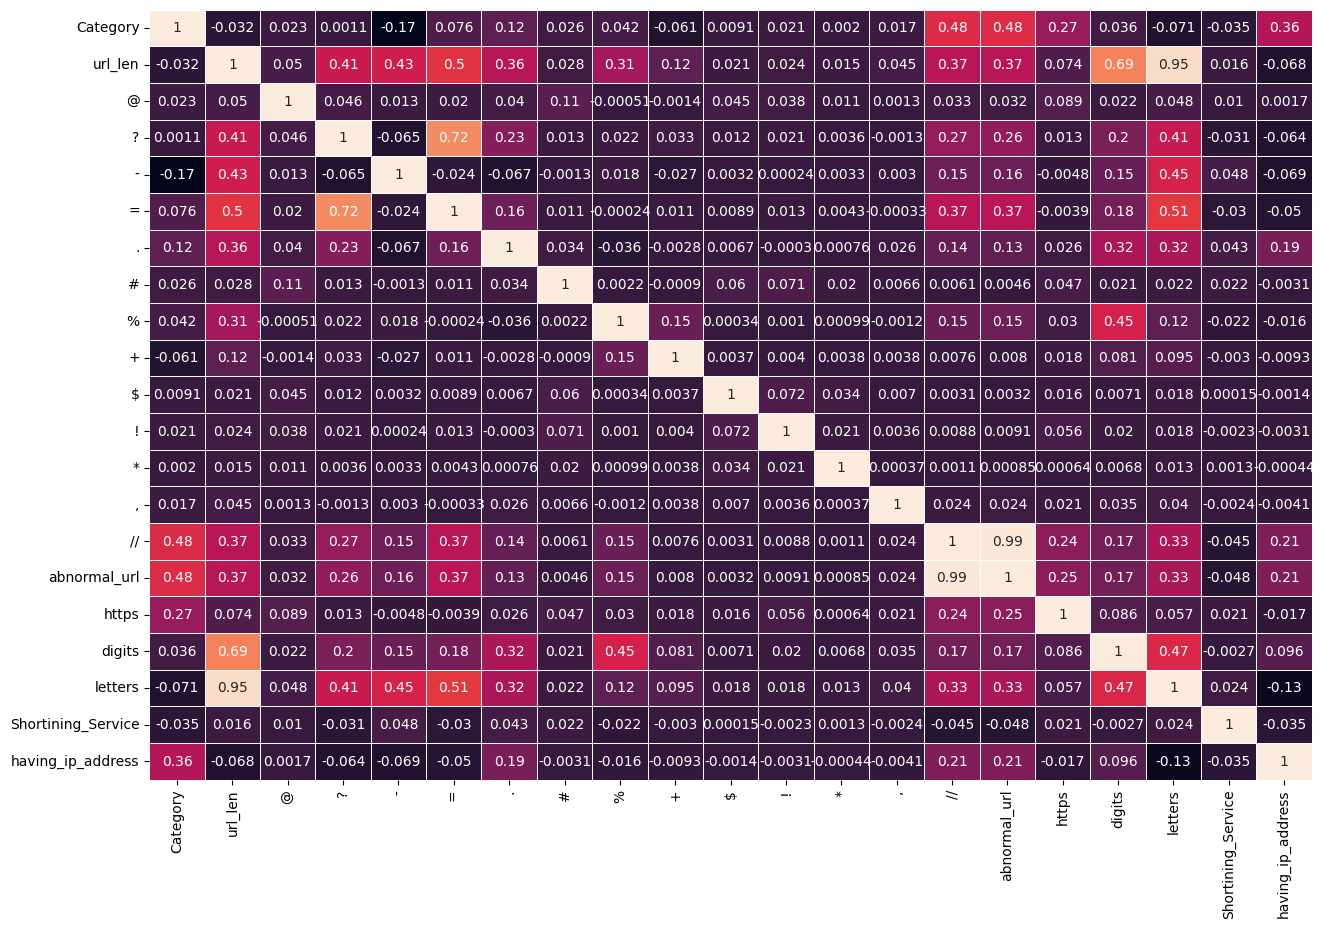

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(urls_data.corr(), linewidths=.5, annot= True, cbar= False)

In [ ]:
urls_data

,url,type,Category,url_len,domain,pri_domain,@,?,-,=,...,!,*,",",//,abnormal_url,https,digits,letters,Shortining_Service,having_ip_address
0,br-icloud.com.br,phishing,2,16,br-icloud.com.br,br-icloud.com.br,0,0,1,0,...,0,0,0,0,0,0,0,13,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,mp3raid.com,mp3raid.com,0,0,0,0,...,0,0,0,0,0,0,1,29,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,bopsecrets.org,bopsecrets.org,0,0,0,0,...,0,0,0,0,0,0,1,25,0,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,garage-pirenne.be,garage-pirenne.be,0,1,1,4,...,0,0,0,1,1,0,7,60,0,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,adventure-nicaragua.net,adventure-nicaragua.net,0,1,1,3,...,0,0,0,1,1,0,22,199,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,2,39,xbox360.ign.com,xbox360.ign.com,0,0,0,0,...,0,0,0,0,0,0,12,21,0,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,2,44,games.teamxbox.com,games.teamxbox.com,0,0,2,0,...,0,0,0,0,0,0,7,29,1,0
651188,gamespot.com/xbox360/action/deadspace/,phishing,2,38,gamespot.com,gamespot.com,0,0,0,0,...,0,0,0,0,0,0,3,30,1,0
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,2,45,en.wikipedia.org,en.wikipedia.org,0,0,0,0,...,0,0,0,0,0,0,0,36,0,0


In [ ]:
X = urls_data.drop(['url','type','Category','domain','pri_domain'],axis=1)#,'type_code'
y = urls_data['Category']

# **Spliting train/test data**



## **spliting(90/10)**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=2)

## **Training Models and Evaluation**

######-Model => <class 'sklearn.tree._classes.DecisionTreeClassifier'> 
Test Accuracy :  91.09%  
Training Time: 4.25 seconds
Prediction Time: 0.02 seconds
              Classification_report 
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     21328
           1       0.93      0.96      0.95      4865
           2       0.81      0.58      0.67      4773
           3       0.94      0.91      0.93      1594

    accuracy                           0.91     32560
   macro avg       0.90      0.86      0.87     32560
weighted avg       0.91      0.91      0.91     32560

             Confusion_matrix 


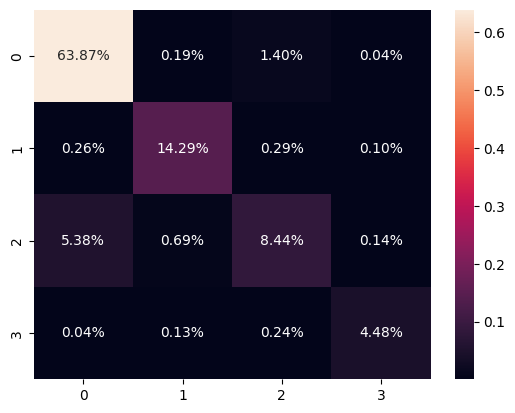

F1 Feature Importance Table:
           Feature  Importance
      abnormal_url    0.347640
           url_len    0.154133
           letters    0.152941
            digits    0.105000
                 -    0.072345
                 .    0.048345
                 =    0.044052
             https    0.034407
                 %    0.013194
                 ?    0.009670
Shortining_Service    0.006283
                 +    0.004186
                //    0.002339
                 ,    0.002281
                 @    0.001066
                 #    0.000973
 having_ip_address    0.000841
                 !    0.000139
                 $    0.000104
                 *    0.000061


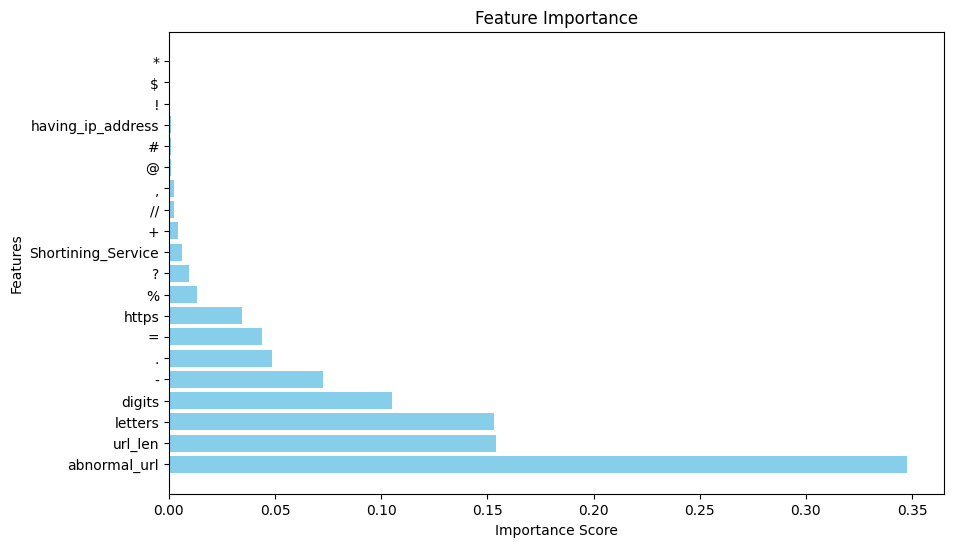

###################- End -###################
######-Model => <class 'sklearn.ensemble._forest.RandomForestClassifier'> 
Test Accuracy :  91.66%  
Training Time: 95.07 seconds
Prediction Time: 1.33 seconds
              Classification_report 
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     21328
           1       0.94      0.97      0.95      4865
           2       0.84      0.59      0.69      4773
           3       0.96      0.92      0.94      1594

    accuracy                           0.92     32560
   macro avg       0.92      0.86      0.88     32560
weighted avg       0.91      0.92      0.91     32560

             Confusion_matrix 


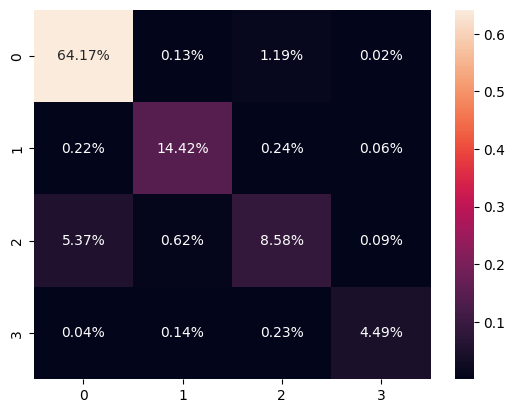

F1 Feature Importance Table:
           Feature  Importance
      abnormal_url    0.181685
           url_len    0.164352
           letters    0.150183
                //    0.134346
            digits    0.088901
                 =    0.061009
                 .    0.054156
                 -    0.052221
             https    0.028713
 having_ip_address    0.025148
                 ?    0.023968
                 %    0.019019
Shortining_Service    0.006244
                 +    0.005256
                 ,    0.001745
                 @    0.001433
                 #    0.000922
                 !    0.000459
                 $    0.000126
                 *    0.000113


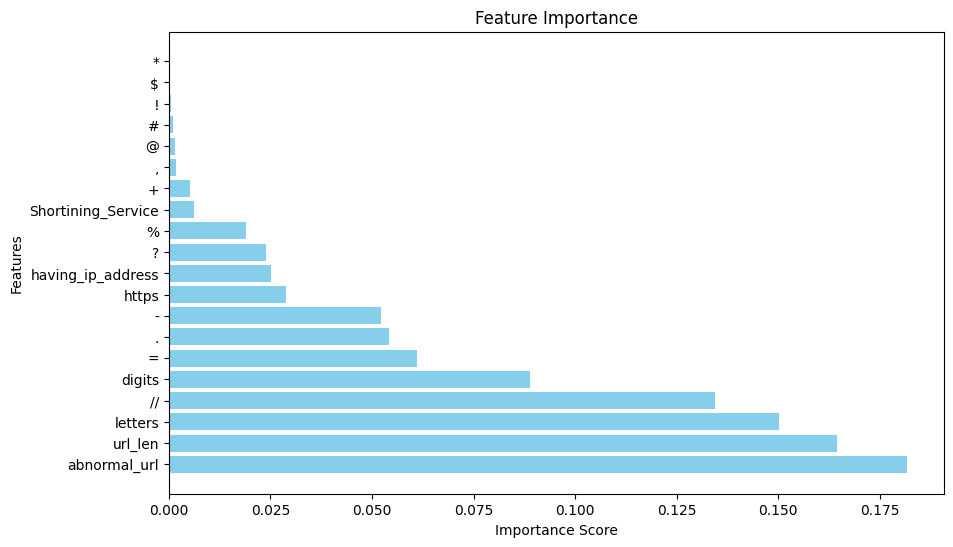

###################- End -###################
######-Model => <class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'> 
Test Accuracy :  82.37%  
Training Time: 26.48 seconds
Prediction Time: 0.29 seconds
              Classification_report 
              precision    recall  f1-score   support

           0       0.84      0.98      0.90     21328
           1       0.83      0.93      0.88      4865
           2       0.49      0.12      0.19      4773
           3       0.83      0.50      0.63      1594

    accuracy                           0.82     32560
   macro avg       0.75      0.63      0.65     32560
weighted avg       0.79      0.82      0.78     32560

             Confusion_matrix 


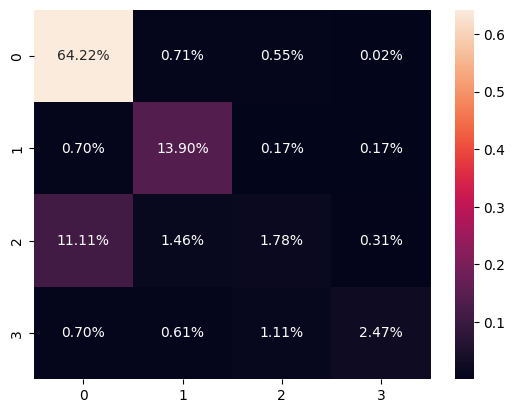

F1 Feature Importance Table:
           Feature  Importance
                 =        0.18
           url_len        0.14
                 .        0.14
                 -        0.12
            digits        0.10
                 %        0.06
                 ?        0.04
           letters        0.04
      abnormal_url        0.04
                //        0.02
Shortining_Service        0.02
             https        0.02
 having_ip_address        0.02
                 ,        0.02
                 @        0.02
                 +        0.02
                 *        0.00
                 $        0.00
                 #        0.00
                 !        0.00


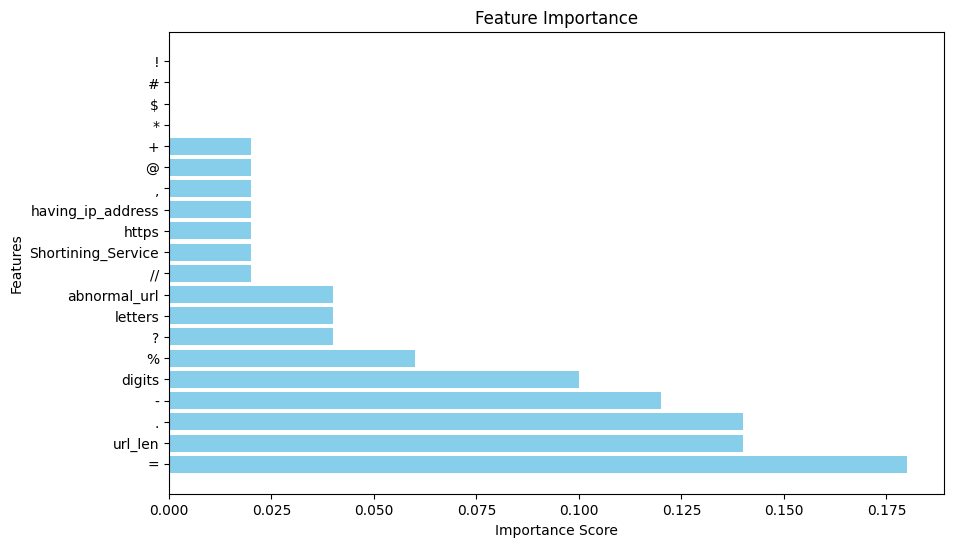

###################- End -###################
######-Model => <class 'sklearn.neighbors._classification.KNeighborsClassifier'> 
Test Accuracy :  89.26%  
Training Time: 0.11 seconds
Prediction Time: 526.91 seconds
              Classification_report 
              precision    recall  f1-score   support

           0       0.91      0.96      0.93     21328
           1       0.90      0.95      0.92      4865
           2       0.76      0.52      0.62      4773
           3       0.94      0.89      0.92      1594

    accuracy                           0.89     32560
   macro avg       0.88      0.83      0.85     32560
weighted avg       0.89      0.89      0.89     32560

             Confusion_matrix 


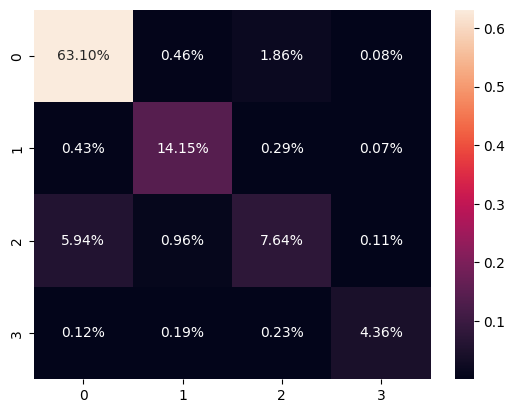

Feature importance not available for this model.
###################- End -###################
######-Model => <class 'sklearn.linear_model._stochastic_gradient.SGDClassifier'> 
Test Accuracy :  81.36%  
Training Time: 78.08 seconds
Prediction Time: 0.01 seconds
              Classification_report 
              precision    recall  f1-score   support

           0       0.84      0.96      0.90     21328
           1       0.75      0.96      0.84      4865
           2       0.39      0.08      0.14      4773
           3       0.92      0.55      0.69      1594

    accuracy                           0.81     32560
   macro avg       0.73      0.64      0.64     32560
weighted avg       0.77      0.81      0.77     32560

             Confusion_matrix 


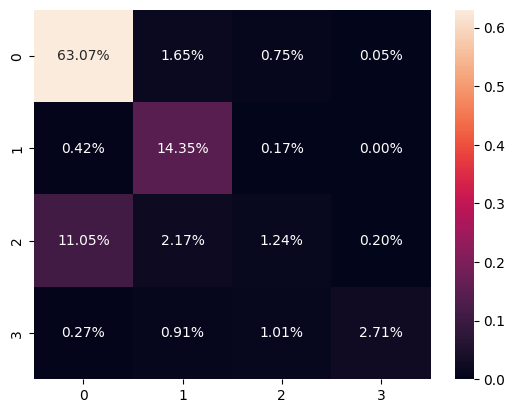

Feature importance not available for this model.
###################- End -###################
######-Model => <class 'sklearn.ensemble._forest.ExtraTreesClassifier'> 
Test Accuracy :  91.63%  
Training Time: 91.69 seconds
Prediction Time: 1.72 seconds
              Classification_report 
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     21328
           1       0.94      0.97      0.95      4865
           2       0.84      0.58      0.69      4773
           3       0.97      0.92      0.94      1594

    accuracy                           0.92     32560
   macro avg       0.92      0.86      0.88     32560
weighted avg       0.91      0.92      0.91     32560

             Confusion_matrix 


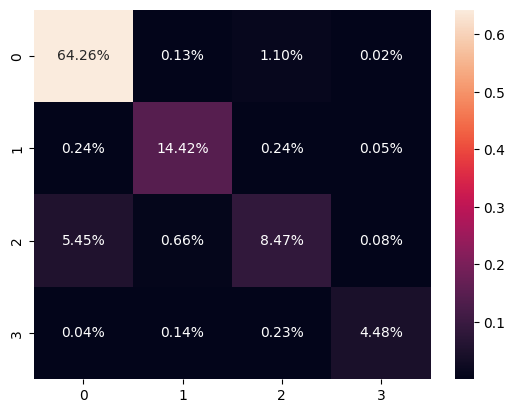

F1 Feature Importance Table:
           Feature  Importance
      abnormal_url    0.296282
           url_len    0.151757
           letters    0.132259
            digits    0.076708
                 -    0.063181
                 .    0.055209
 having_ip_address    0.046408
                 =    0.045040
                //    0.042297
             https    0.031068
                 %    0.025652
                 ?    0.018116
                 +    0.006966
Shortining_Service    0.004048
                 @    0.001715
                 ,    0.001582
                 #    0.000980
                 !    0.000481
                 $    0.000132
                 *    0.000118


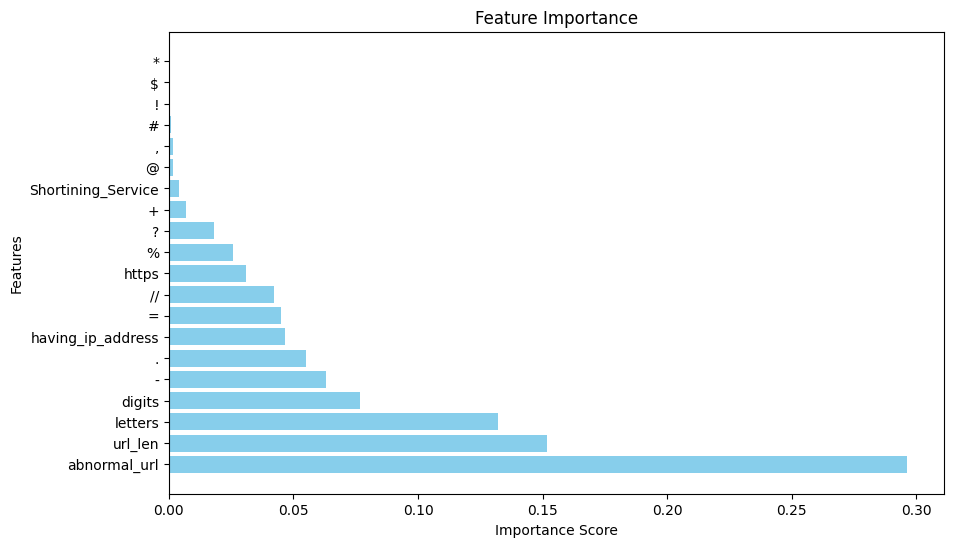

###################- End -###################
######-Model => <class 'sklearn.naive_bayes.GaussianNB'> 
Test Accuracy :  78.97%  
Training Time: 0.35 seconds
Prediction Time: 0.02 seconds
              Classification_report 
              precision    recall  f1-score   support

           0       0.84      0.92      0.88     21328
           1       0.66      1.00      0.80      4865
           2       0.66      0.03      0.05      4773
           3       0.63      0.72      0.67      1594

    accuracy                           0.79     32560
   macro avg       0.70      0.67      0.60     32560
weighted avg       0.78      0.79      0.74     32560

             Confusion_matrix 


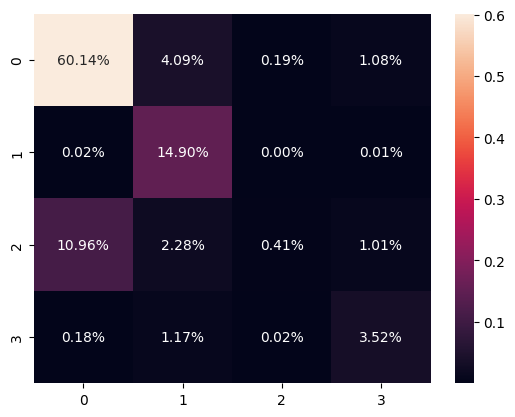

Feature importance not available for this model.
###################- End -###################


In [ ]:
models = [DecisionTreeClassifier, RandomForestClassifier, AdaBoostClassifier, KNeighborsClassifier, SGDClassifier, ExtraTreesClassifier, GaussianNB]
accuracy_test = []
stored_macro_avg_f1 = []

for m in models:
    print('######-Model =>\033[07m {} \033[0m'.format(m))
    model_ = m()
    start_time = time.time()
    model_.fit(X_train, y_train)
    end_time = time.time()
    prediction_start_time = time.time()
    pred = model_.predict(X_test)
    prediction_end_time = time.time()
    acc = accuracy_score(pred, y_test)
    accuracy_test.append(acc)
    print('Test Accuracy :\033[32m \033[01m {:.2f}% \033[30m \033[0m'.format(acc * 100))
    training_time = end_time - start_time
    print('Training Time: {:.2f} seconds'.format(training_time))
    prediction_time = prediction_end_time - prediction_start_time
    print('Prediction Time: {:.2f} seconds'.format(prediction_time))
    print('\033[01m              Classification_report \033[0m')
    print(classification_report(y_test, pred))
    print('\033[01m             Confusion_matrix \033[0m')
    macf1 = f1_score(y_test, pred, average='macro')
    stored_macro_avg_f1.append(macf1)
    cf_matrix = confusion_matrix(y_test, pred)
    plot_ = sns.heatmap(cf_matrix / np.sum(cf_matrix), annot=True, fmt='0.2%')
    plt.show()

    if hasattr(model_, 'feature_importances_'):
        feature_importance = pd.DataFrame({'Feature': X_test.columns, 'Importance': model_.feature_importances_})
        feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
        print('\033[01mF1 Feature Importance Table:\033[0m')
        print(feature_importance.to_string(index=False))
        feature_names = feature_importance['Feature']
        importance_scores = feature_importance['Importance']
        plt.figure(figsize=(10, 6))
        plt.barh(feature_names, importance_scores, color='skyblue')
        plt.xlabel('Importance Score')
        plt.ylabel('Features')
        plt.title('Feature Importance')
        plt.show()
    else:
        print('Feature importance not available for this model.')

    print('\033[31m###################- End -###################\033[0m')


# **Split 95/5**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2)

######-Model => <class 'sklearn.tree._classes.DecisionTreeClassifier'> 
Test Accuracy :  91.20%  
Training Time: 3.25 seconds
Prediction Time: 0.03 seconds
              Classification_report 
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     42756
           1       0.93      0.96      0.95      9735
           2       0.81      0.58      0.67      9383
           3       0.95      0.91      0.93      3246

    accuracy                           0.91     65120
   macro avg       0.90      0.86      0.87     65120
weighted avg       0.91      0.91      0.91     65120

             Confusion_matrix 


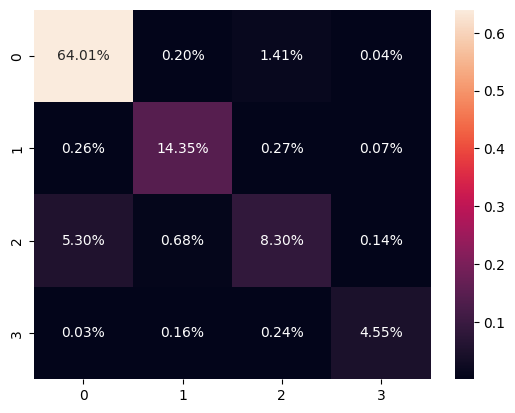

F1 Feature Importance Table:
           Feature  Importance
      abnormal_url    0.347200
           url_len    0.155009
           letters    0.152918
            digits    0.104350
                 -    0.072166
                 .    0.048756
                 =    0.044117
             https    0.034551
                 %    0.013042
                 ?    0.009556
Shortining_Service    0.006373
                 +    0.004126
                //    0.002388
                 ,    0.002368
                 @    0.001071
 having_ip_address    0.000876
                 #    0.000824
                 !    0.000139
                 $    0.000114
                 *    0.000056


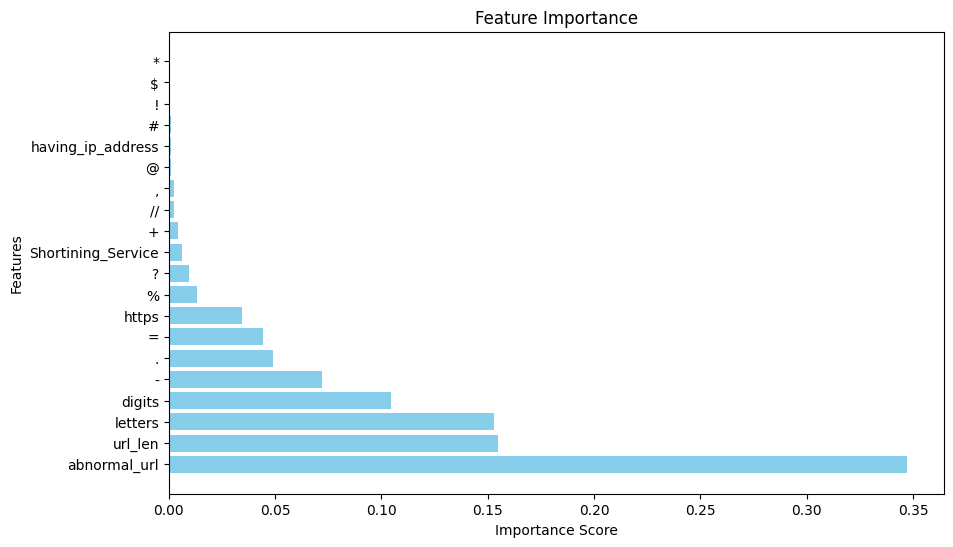

###################- End -###################
######-Model => <class 'sklearn.ensemble._forest.RandomForestClassifier'> 
Test Accuracy :  91.72%  
Training Time: 85.94 seconds
Prediction Time: 2.57 seconds
              Classification_report 
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     42756
           1       0.94      0.96      0.95      9735
           2       0.84      0.58      0.69      9383
           3       0.97      0.91      0.94      3246

    accuracy                           0.92     65120
   macro avg       0.92      0.86      0.88     65120
weighted avg       0.91      0.92      0.91     65120

             Confusion_matrix 


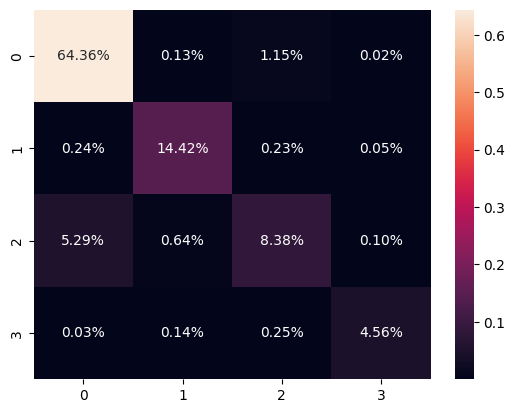

F1 Feature Importance Table:
           Feature  Importance
      abnormal_url    0.205137
           url_len    0.165366
           letters    0.149525
                //    0.108369
            digits    0.088833
                 =    0.070316
                 .    0.054442
                 -    0.053399
             https    0.028273
 having_ip_address    0.021587
                 ?    0.020032
                 %    0.018759
Shortining_Service    0.006033
                 +    0.005137
                 ,    0.001709
                 @    0.001395
                 #    0.000951
                 !    0.000488
                 $    0.000134
                 *    0.000112


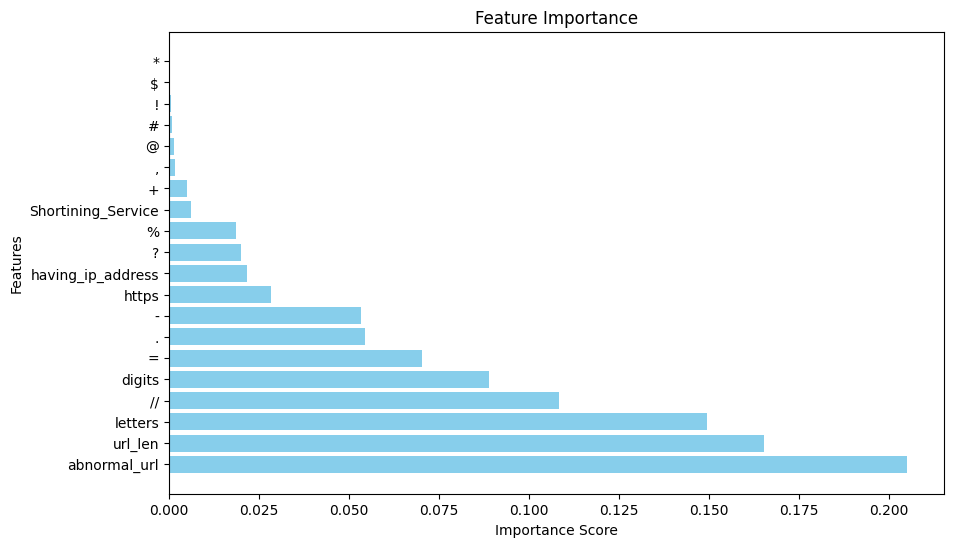

###################- End -###################
######-Model => <class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'> 
Test Accuracy :  80.96%  
Training Time: 27.38 seconds
Prediction Time: 0.60 seconds
              Classification_report 
              precision    recall  f1-score   support

           0       0.84      0.97      0.90     42756
           1       0.83      0.83      0.83      9735
           2       0.36      0.15      0.22      9383
           3       0.87      0.47      0.61      3246

    accuracy                           0.81     65120
   macro avg       0.72      0.61      0.64     65120
weighted avg       0.77      0.81      0.78     65120

             Confusion_matrix 


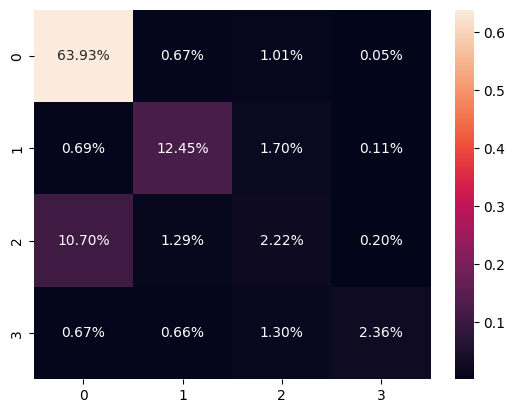

F1 Feature Importance Table:
           Feature  Importance
                 .        0.20
                 -        0.14
                 =        0.14
           url_len        0.12
            digits        0.12
                 %        0.06
                 ?        0.04
      abnormal_url        0.04
                 ,        0.02
           letters        0.02
             https        0.02
                //        0.02
 having_ip_address        0.02
                 @        0.02
                 +        0.02
                 *        0.00
                 $        0.00
                 #        0.00
Shortining_Service        0.00
                 !        0.00


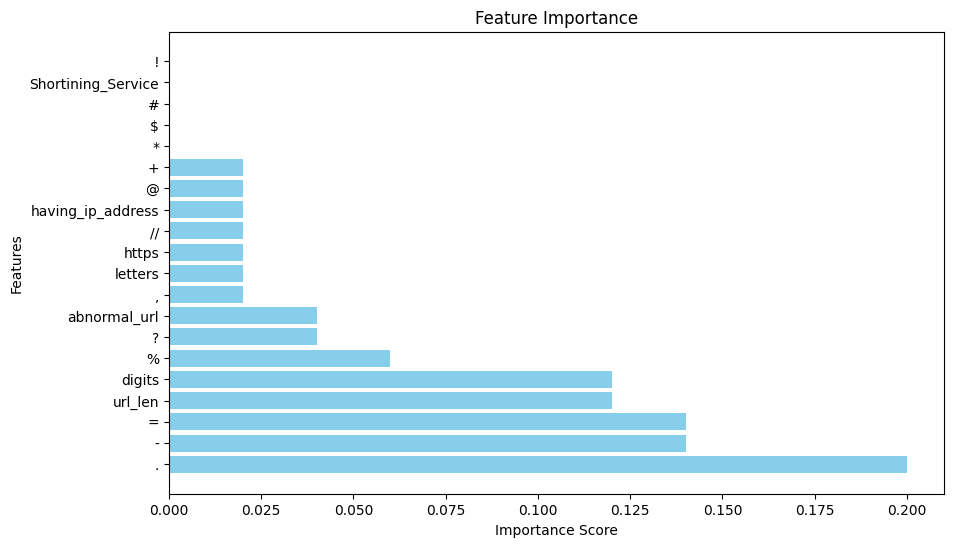

###################- End -###################
######-Model => <class 'sklearn.neighbors._classification.KNeighborsClassifier'> 
Test Accuracy :  89.19%  
Training Time: 0.08 seconds
Prediction Time: 901.37 seconds
              Classification_report 
              precision    recall  f1-score   support

           0       0.91      0.96      0.93     42756
           1       0.90      0.95      0.92      9735
           2       0.73      0.54      0.62      9383
           3       0.95      0.89      0.92      3246

    accuracy                           0.89     65120
   macro avg       0.87      0.83      0.85     65120
weighted avg       0.89      0.89      0.89     65120

             Confusion_matrix 


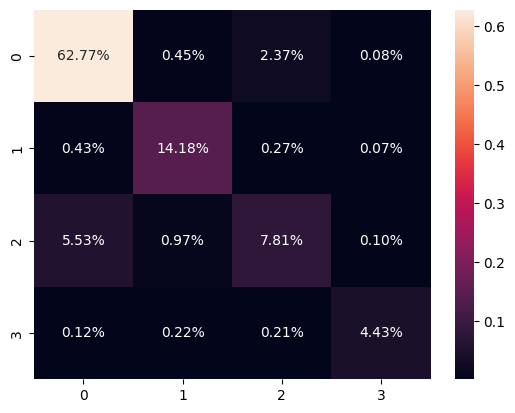

Feature importance not available for this model.
###################- End -###################
######-Model => <class 'sklearn.linear_model._stochastic_gradient.SGDClassifier'> 
Test Accuracy :  80.89%  
Training Time: 76.12 seconds
Prediction Time: 0.01 seconds
              Classification_report 
              precision    recall  f1-score   support

           0       0.85      0.96      0.90     42756
           1       0.78      0.94      0.85      9735
           2       0.68      0.00      0.00      9383
           3       0.51      0.80      0.63      3246

    accuracy                           0.81     65120
   macro avg       0.70      0.67      0.60     65120
weighted avg       0.80      0.81      0.75     65120

             Confusion_matrix 


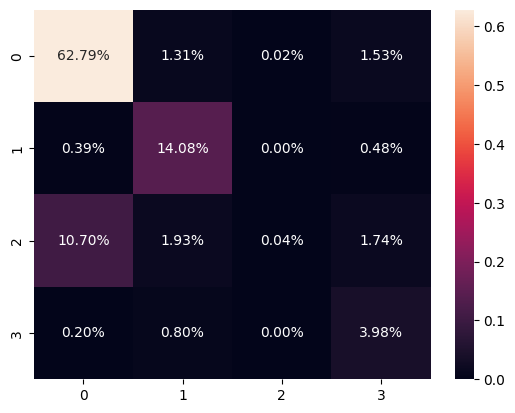

Feature importance not available for this model.
###################- End -###################
######-Model => <class 'sklearn.ensemble._forest.ExtraTreesClassifier'> 
Test Accuracy :  91.73%  
Training Time: 87.62 seconds
Prediction Time: 4.23 seconds
              Classification_report 
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     42756
           1       0.94      0.97      0.95      9735
           2       0.84      0.58      0.69      9383
           3       0.97      0.91      0.94      3246

    accuracy                           0.92     65120
   macro avg       0.92      0.86      0.88     65120
weighted avg       0.91      0.92      0.91     65120

             Confusion_matrix 


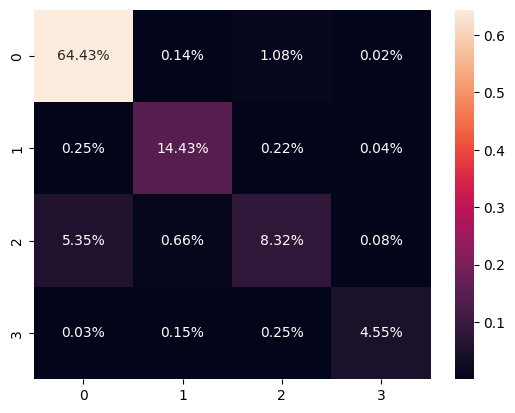

F1 Feature Importance Table:
           Feature  Importance
      abnormal_url    0.297749
           url_len    0.148954
           letters    0.135350
            digits    0.076761
                 -    0.064443
                 .    0.054384
 having_ip_address    0.046905
                //    0.043631
                 =    0.040625
             https    0.030821
                 %    0.025145
                 ?    0.019365
                 +    0.007122
Shortining_Service    0.003818
                 @    0.001719
                 ,    0.001554
                 #    0.000966
                 !    0.000445
                 $    0.000132
                 *    0.000113


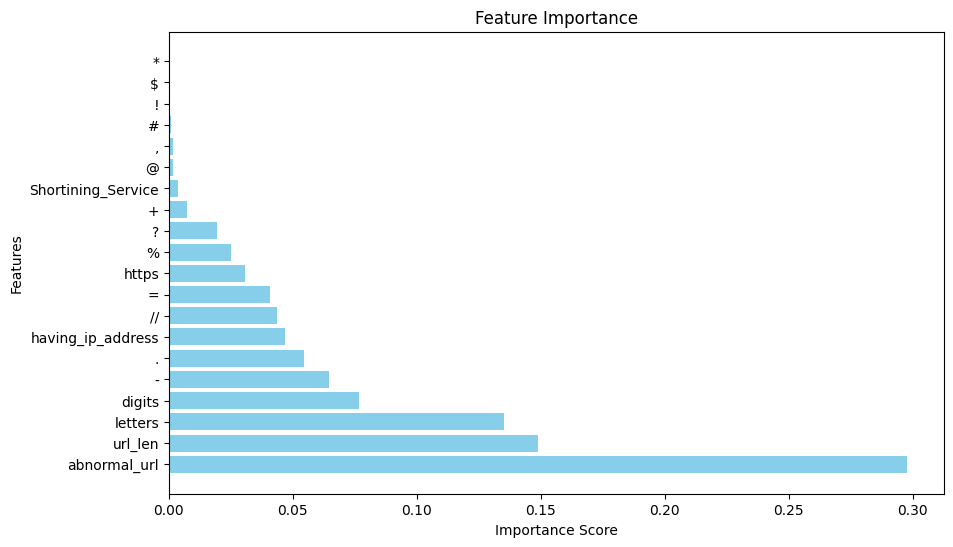

###################- End -###################
######-Model => <class 'sklearn.naive_bayes.GaussianNB'> 
Test Accuracy :  79.12%  
Training Time: 0.39 seconds
Prediction Time: 0.03 seconds
              Classification_report 
              precision    recall  f1-score   support

           0       0.85      0.92      0.88     42756
           1       0.66      1.00      0.80      9735
           2       0.63      0.03      0.05      9383
           3       0.62      0.71      0.66      3246

    accuracy                           0.79     65120
   macro avg       0.69      0.66      0.60     65120
weighted avg       0.78      0.79      0.74     65120

             Confusion_matrix 


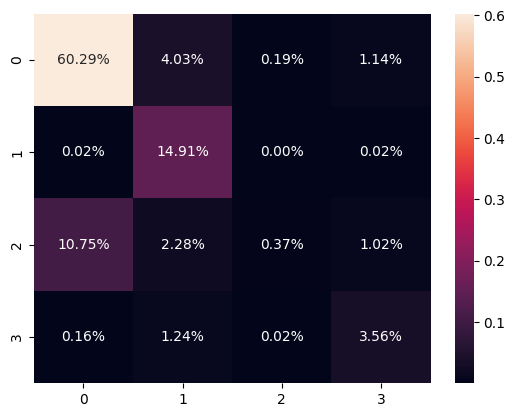

Feature importance not available for this model.
###################- End -###################


In [ ]:
models = [DecisionTreeClassifier, RandomForestClassifier, AdaBoostClassifier, KNeighborsClassifier, SGDClassifier, ExtraTreesClassifier, GaussianNB]
accuracy_test = []
stored_macro_avg_f1 = []

for m in models:
    print('######-Model =>\033[07m {} \033[0m'.format(m))
    model_ = m()
    start_time = time.time()
    model_.fit(X_train, y_train)
    end_time = time.time()
    prediction_start_time = time.time()
    pred = model_.predict(X_test)
    prediction_end_time = time.time()
    acc = accuracy_score(pred, y_test)
    accuracy_test.append(acc)
    print('Test Accuracy :\033[32m \033[01m {:.2f}% \033[30m \033[0m'.format(acc * 100))
    training_time = end_time - start_time
    print('Training Time: {:.2f} seconds'.format(training_time))
    prediction_time = prediction_end_time - prediction_start_time
    print('Prediction Time: {:.2f} seconds'.format(prediction_time))
    print('\033[01m              Classification_report \033[0m')
    print(classification_report(y_test, pred))
    print('\033[01m             Confusion_matrix \033[0m')
    macf1 = f1_score(y_test, pred, average='macro')
    stored_macro_avg_f1.append(macf1)
    cf_matrix = confusion_matrix(y_test, pred)
    plot_ = sns.heatmap(cf_matrix / np.sum(cf_matrix), annot=True, fmt='0.2%')
    plt.show()

    if hasattr(model_, 'feature_importances_'):
        feature_importance = pd.DataFrame({'Feature': X_test.columns, 'Importance': model_.feature_importances_})
        feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
        print('\033[01mF1 Feature Importance Table:\033[0m')
        print(feature_importance.to_string(index=False))
        feature_names = feature_importance['Feature']
        importance_scores = feature_importance['Importance']
        plt.figure(figsize=(10, 6))
        plt.barh(feature_names, importance_scores, color='skyblue')
        plt.xlabel('Importance Score')
        plt.ylabel('Features')
        plt.title('Feature Importance')
        plt.show()
    else:
        print('Feature importance not available for this model.')

    print('\033[31m###################- End -###################\033[0m')


## **FINAL REPORT**

In [ ]:
output = pd.DataFrame({"Model":['Decision Tree Classifier','Random Forest Classifier', 'AdaBoost Classifier','KNeighbors Classifier','SGD Classifier', 'Extra Trees Classifier','Gaussian NB'], "Accuracy":accuracy_test})

output

,Model,Accuracy
0,Decision Tree Classifier,0.912024
1,Random Forest Classifier,0.917199
2,AdaBoost Classifier,0.809598
3,KNeighbors Classifier,0.891923
4,SGD Classifier,0.808937
5,Extra Trees Classifier,0.917276
6,Gaussian NB,0.791247


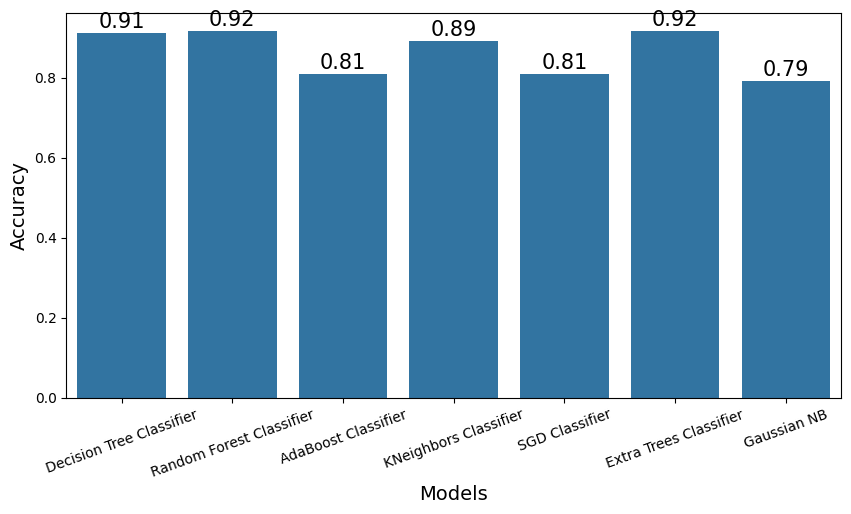

In [ ]:
plt.figure(figsize=(10, 5))
plots = sns.barplot(x='Model', y='Accuracy', data=output)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', size=15, xytext=(0, 8), textcoords='offset points')

plt.xlabel("Models", size=14)
plt.xticks(rotation=20);
plt.ylabel("Accuracy", size=14)
plt.show()

## **#############**